<a href="https://colab.research.google.com/github/ThalesRod/lol-pro-match-prediction/blob/main/CBLOL_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Professional League of Legends matches prediction

A data science project to analyze data from professional League of Legends matches and try to predict their outcome only with data from up to a certain point of the match.

This notebook contains the exploratory analysis, data manipulation and modeling, and classification algorithms and their evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data:

In [2]:
cblol_data = pd.read_csv('https://github.com/ThalesRod/lol-pro-match-prediction/raw/main/data/cblol_data_updated_at_10.csv')

In [3]:
cblol_data.shape

(90, 10)

In [4]:
cblol_data.head()

,game_id,team1_total_gold,team2_total_gold,team1_total_kills,team2_total_kills,team1_total_buildings,team2_total_buildings,team1_total_dragons,team2_total_dragons,winner_team
0,1991346,15098,15913,1,3,0,0,0,0,1
1,2062818,16442,16321,3,5,0,0,0,0,2
2,2052020,15260,14920,3,3,0,0,1,0,2
3,2133546,15140,15325,1,0,0,0,0,1,2
4,2066073,14378,14702,0,0,0,0,0,1,1


Testing whether the dataset is balanced:

Team 1: 46.7% | Team 2: 53.3%

In [5]:
cblol_data['winner_team'].value_counts()

2    48
1    42
Name: winner_team, dtype: int64

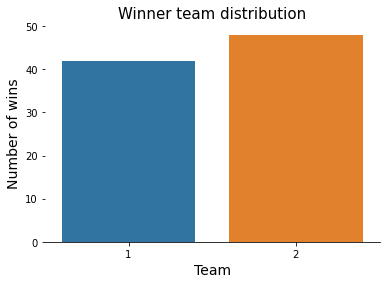

In [6]:
ax = sns.countplot(x = 'winner_team', data=cblol_data)
ax.set_title("Winner team distribution", fontdict={'fontsize':15})
ax.set_xlabel('Team', fontdict={'fontsize':14})
ax.set_ylabel('Number of wins', fontdict={'fontsize':14})

for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

plt.show()

The distribution of the response variable is around 50%, so the dataset is balanced.

## Teams total gold analysis:

Basic stats:

In [7]:
print("Mean:")
print(cblol_data[['team1_total_gold', 'team2_total_gold']].mean())
print("\nMedian:")
print(cblol_data[['team1_total_gold', 'team2_total_gold']].median())
print("\nStandard Deviation:")
print(cblol_data[['team1_total_gold', 'team2_total_gold']].std())

Mean:
team1_total_gold    15701.077778
team2_total_gold    15651.300000
dtype: float64

Median:
team1_total_gold    15610.5
team2_total_gold    15598.5
dtype: float64

Standard Deviation:
team1_total_gold     832.853835
team2_total_gold    1093.897829
dtype: float64


Gold frequency of a SINGLE team in the match:

In [8]:
single_team_gold = pd.concat([cblol_data['team1_total_gold'], cblol_data['team2_total_gold']])

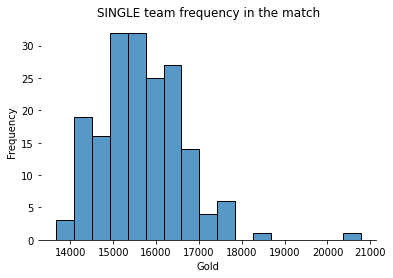

In [9]:
ax = sns.histplot(single_team_gold)
ax.set_title("SINGLE team frequency in the match")
ax.set_xlabel("Gold")
ax.set_ylabel("Frequency")

for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

plt.show()

In [10]:
pd.concat([cblol_data['team1_total_gold'], cblol_data['team2_total_gold']]).mean()

15676.18888888889

Gold difference to evaluate a team's advantage:

In [11]:
# gold difference of team 1 with respect to team 2
gold_diff = cblol_data['team1_total_gold'] - cblol_data['team2_total_gold']

In [12]:
print("Mean:")
print(gold_diff.mean())
print("\nMedian:")
print(gold_diff.median())
print("\nStandard Deviation:")
print(gold_diff.std())

Mean:
49.77777777777778

Median:
-19.0

Standard Deviation:
1466.2090978444198


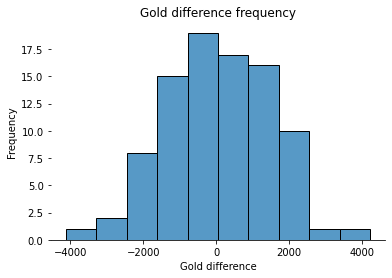

In [13]:
ax = sns.histplot(gold_diff)
ax.set_title("Gold difference frequency")
ax.set_xlabel("Gold difference")
ax.set_ylabel("Frequency")

for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

plt.show()

## Teams total champion kills analysis:

Basic stats:

In [14]:
print("Mean:")
print(cblol_data[['team1_total_kills', 'team2_total_kills']].mean())
print("\nMedian:")
print(cblol_data[['team1_total_kills', 'team2_total_kills']].median())
print("\nStandard Deviation:")
print(cblol_data[['team1_total_kills', 'team2_total_kills']].std())

Mean:
team1_total_kills    2.422222
team2_total_kills    2.333333
dtype: float64

Median:
team1_total_kills    2.0
team2_total_kills    2.0
dtype: float64

Standard Deviation:
team1_total_kills    1.760859
team2_total_kills    2.033428
dtype: float64


Champion kills frequency of a SINGLE team in the match:

In [15]:
single_team_kills = pd.concat([cblol_data['team1_total_kills'], cblol_data['team2_total_kills']]).value_counts()

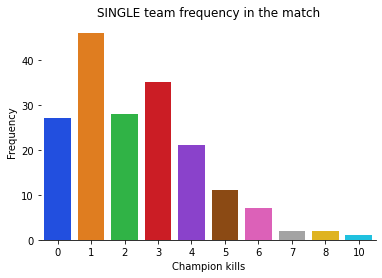

In [16]:
ax = sns.barplot(x=single_team_kills.index, y=single_team_kills, palette='bright')
ax.set_title("SINGLE team frequency in the match")
ax.set_xlabel("Champion kills")
ax.set_ylabel("Frequency")

for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

plt.show()

Frequency of champion kills for BOTH teams in the match:

In [17]:
both_teams_kills = (cblol_data['team1_total_kills'] + cblol_data['team2_total_kills']).value_counts()

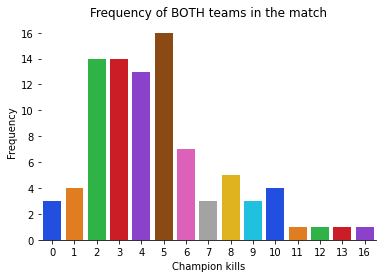

In [18]:
ax = sns.barplot(x=both_teams_kills.index, y=both_teams_kills, palette='bright')
ax.set_title("Frequency of BOTH teams in the match")
ax.set_xlabel("Champion kills")
ax.set_ylabel("Frequency")

for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

plt.show()

## Teams total destroyed buildings analysis:

Destroyed buildings frequency of a SINGLE team in the match:

In [19]:
single_team_buildings = pd.concat([cblol_data['team1_total_buildings'], cblol_data['team2_total_buildings']]).value_counts()
single_team_buildings

0    174
1      6
dtype: int64

Destroyed buildings frequency of BOTH teams in the match:

In [20]:
both_teams_buildings = (cblol_data['team1_total_buildings'] + cblol_data['team2_total_buildings']).value_counts()
both_teams_buildings

0    84
1     6
dtype: int64

As in more than 90% of the dataset matches no buildings were destroyed, it may be a feature that has little effect on an estimate.

## Teams total slain dragons analysis:

Slain dragons frequency of a SINGLE team in the match:

In [21]:
single_team_dragons = pd.concat([cblol_data['team1_total_dragons'], cblol_data['team2_total_dragons']]).value_counts()
single_team_dragons

0    120
1     60
dtype: int64

Slain dragons frequency of BOTH teams in the match:

In [22]:
both_teams_dragons = (cblol_data['team1_total_dragons'] + cblol_data['team2_total_dragons']).value_counts()
both_teams_dragons

1    60
0    30
dtype: int64

## Correlation analysis:

Analyzing the correlation between the teams' gold difference at 10 minutes with the result of the match:

In [23]:
gold_diff_positive = gold_diff[gold_diff >= 0] # positive gold difference of team 1 with respect to team 2 (advantage)
gold_diff_negative = gold_diff[gold_diff < 0] # negative gold difference of team 1 with respect to team 2 (disadvantage)

Cross tabulation of advantage for team 1 and the result of the match:

In [24]:
pd.crosstab(pd.cut(gold_diff_positive, 10), cblol_data['winner_team'], rownames=['Gold diff'], normalize='index')

winner_team,1,2
Gold diff,,
"(69.857, 488.3]",0.272727,0.727273
"(488.3, 902.6]",0.333333,0.666667
"(902.6, 1316.9]",0.625000,0.375000
"(1316.9, 1731.2]",0.875000,0.125000
"(1731.2, 2145.5]",0.833333,0.166667
"(2145.5, 2559.8]",1.000000,0.000000
"(2559.8, 2974.1]",1.000000,0.000000
"(3802.7, 4217.0]",1.000000,0.000000


Cross tabulation of disadvantage for team 1 and the result of the match:

In [25]:
pd.crosstab(pd.cut(gold_diff_negative, 10), cblol_data['winner_team'], rownames=['Gold diff'], normalize='index')

winner_team,1,2
Gold diff,,
"(-4130.014, -3724.6]",0.000000,1.000000
"(-2921.8, -2520.4]",0.000000,1.000000
"(-2520.4, -2119.0]",0.000000,1.000000
"(-2119.0, -1717.6]",0.600000,0.400000
"(-1717.6, -1316.2]",0.200000,0.800000
"(-1316.2, -914.8]",0.400000,0.600000
"(-914.8, -513.4]",0.333333,0.666667
"(-513.4, -112.0]",0.333333,0.666667


When the absolute diffence between the teams at 10 minutes is above 1300 of gold, the result of the match tends to favour the team with advantage.

Analyzing the correlation between the teams' destroyed buildings at 10 minutes with the result of the match:

In [26]:
pd.crosstab([cblol_data['team1_total_buildings'], cblol_data['team2_total_buildings']], cblol_data['winner_team'], rownames=['Team 1 Buildings', 'Team 2 Buildings'])

winner_team                         1   2
Team 1 Buildings Team 2 Buildings        
0                0                 39  45
                 1                  1   2
1                0                  2   1

Analyzing the correlation between the teams' slain dragons at 10 minutes with the result of the match:

In [27]:
pd.crosstab([cblol_data['team1_total_dragons'], cblol_data['team2_total_dragons']], cblol_data['winner_team'], rownames=['Team 1 Dragons', 'Team 2 Dragons'])

winner_team                     1   2
Team 1 Dragons Team 2 Dragons        
0              0               13  17
               1               13  18
1              0               16  13

Analyzing the correlation between the teams' gold difference at 10 minutes with the champion kills:

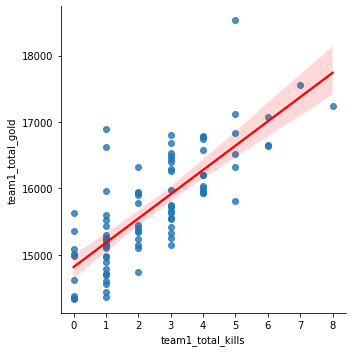

In [28]:
sns.lmplot(x='team1_total_kills', y='team1_total_gold', data=cblol_data, line_kws={'color': 'red'})

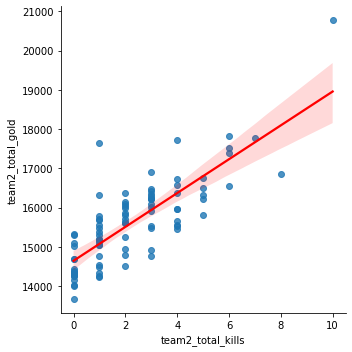

In [29]:
sns.lmplot(x='team2_total_kills', y='team2_total_gold', data=cblol_data, line_kws={'color': 'red'})

A correlation was observed between the two variables, this makes sense because in the game the kills increase the team's total gold.

Creating correlation matrix of variables:

In [30]:
cblol_data.loc[:, 'team1_total_gold':'team2_total_dragons'].corr()

,team1_total_gold,team2_total_gold,team1_total_kills,team2_total_kills,team1_total_buildings,team2_total_buildings,team1_total_dragons,team2_total_dragons
team1_total_gold,1.000000,-0.142423,0.773587,-1.850601e-02,3.635794e-01,-0.091047,0.068948,0.049650
team2_total_gold,-0.142423,1.000000,0.006519,8.017596e-01,2.219756e-02,0.302839,-0.102458,-0.027391
team1_total_kills,0.773587,0.006519,1.000000,2.615022e-01,6.127221e-02,-0.080125,-0.084787,0.038873
team2_total_kills,-0.018506,0.801760,0.261502,1.000000e+00,-1.444363e-17,0.030611,-0.137177,-0.119490
team1_total_buildings,0.363579,0.022198,0.061272,-1.444363e-17,1.000000e+00,-0.034483,0.269319,-0.134603
team2_total_buildings,-0.091047,0.302839,-0.080125,3.061097e-02,-3.448276e-02,1.000000,-0.128037,0.125919
team1_total_dragons,0.068948,-0.102458,-0.084787,-1.371767e-01,2.693190e-01,-0.128037,1.000000,-0.499792
team2_total_dragons,0.049650,-0.027391,0.038873,-1.194898e-01,-1.346033e-01,0.125919,-0.499792,1.000000


Greater proportional relationships are observed between the variables of total gold and champion kills.

Correlation matrix heat map:

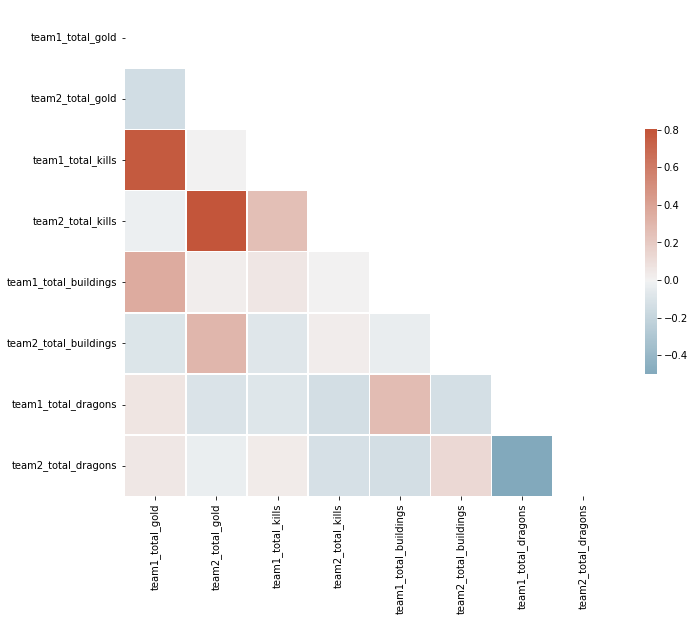

In [31]:
corr = cblol_data.loc[:, 'team1_total_gold':'team2_total_dragons'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## Data modeling:

In [32]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [33]:
cblol_data_normalized = cblol_data.copy()
# normalizing data
cblol_data_normalized['team1_total_gold'] = cblol_data_normalized['team1_total_gold'].apply( lambda value: (value - cblol_data_normalized['team1_total_gold'].mean() ) / cblol_data_normalized['team1_total_gold'].std() )
cblol_data_normalized['team2_total_gold'] = cblol_data_normalized['team2_total_gold'].apply( lambda value: (value - cblol_data_normalized['team2_total_gold'].mean() ) / cblol_data_normalized['team2_total_gold'].std() )

The next 3 cells are used to run the algorithms with different variables arrangements (run one at a time):

In [40]:
# using normalized data and splitting dataset
x = cblol_data_normalized.loc[:, 'team1_total_gold':'team2_total_dragons']
y = cblol_data_normalized['winner_team']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 29)

In [35]:
x = cblol_data_normalized.loc[:, 'team1_total_gold':'team2_total_dragons'].drop(['team1_total_buildings', 'team2_total_buildings'], axis=1)
y = cblol_data_normalized['winner_team']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 29)

In [36]:
x = cblol_data_normalized.loc[:, ['team1_total_gold', 'team2_total_gold', 'team1_total_dragons', 'team2_total_dragons']]
y = cblol_data_normalized['winner_team']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 29)

Linear SVC:

In [41]:
model_lsvc = LinearSVC(max_iter=1e4)
model_lsvc.fit(x_train, y_train)
model_lsvc.score(x_test, y_test)

0.6666666666666666

Linear SVC confusion matrix:

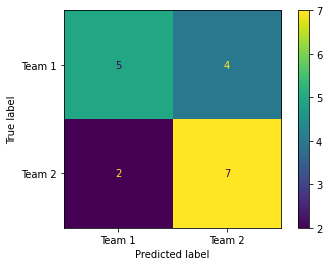

In [42]:
plot_confusion_matrix(model_lsvc, x_test, y_test, display_labels=['Team 1', 'Team 2'])
plt.show()

KNN:

In [43]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)
model_knn.score(x_test, y_test)

0.5555555555555556

KNN confusion matrix:

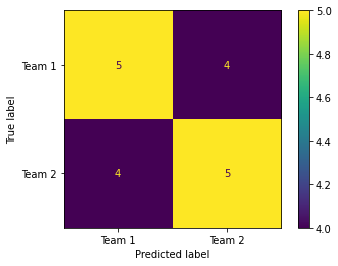

In [44]:
plot_confusion_matrix(model_knn, x_test, y_test, display_labels=['Team 1', 'Team 2'])
plt.show()

Logistic Regression:

In [45]:
model_lregression = LogisticRegression()
model_lregression.fit(x_train, y_train)
model_lregression.score(x_test, y_test)

0.6666666666666666

Logistic Regression confusion matrix:

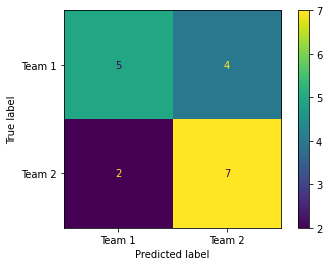

In [46]:
plot_confusion_matrix(model_lregression, x_test, y_test, display_labels=['Team 1', 'Team 2'])
plt.show()

Decision Tree:

In [47]:
model_tree = DecisionTreeClassifier(max_depth = 10, random_state = 29)
model_tree.fit(x_train, y_train)
model_tree.score(x_test, y_test)

0.6111111111111112

Decision Tree confusion matrix:

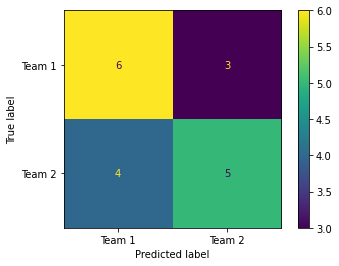

In [48]:
plot_confusion_matrix(model_tree, x_test, y_test, display_labels=['Team 1', 'Team 2'])
plt.show()

Dummy Classifier:

In [49]:
model_dummy = DummyClassifier('most_frequent')
model_dummy.fit(x_train, y_train)
model_dummy.score(x_test, y_test)

0.5

Comparison of the accuracy of the models:

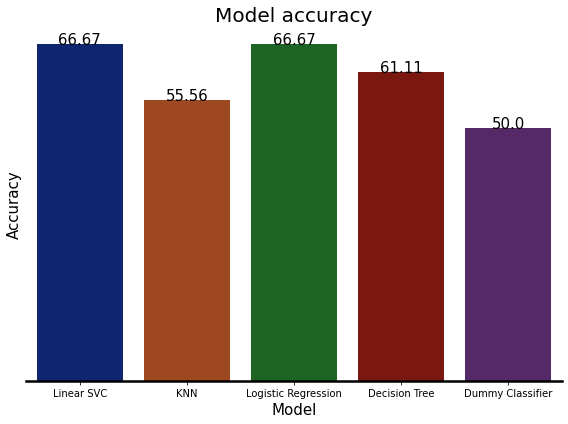

In [50]:
models = ['Linear SVC', 'KNN', 'Logistic Regression', 'Decision Tree' , 'Dummy Classifier']
models_scores = [model_lsvc.score(x_test, y_test),
                 model_knn.score(x_test, y_test),
                 model_lregression.score(x_test, y_test),
                 model_tree.score(x_test, y_test),
                 model_dummy.score(x_test, y_test)]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=models, y=models_scores, ax=ax, palette='dark')
ax.set_title("Model accuracy", fontsize=20)
ax.set_xlabel("Model", fontsize=15)
ax.set_ylabel("Accuracy", fontsize=15)

ax.spines['bottom'].set_linewidth(2.5)
ax.tick_params(axis='y', labelleft=False, left=None)   

for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

for index, score in enumerate(models_scores):
    ax.text(index, score, np.round(score*100, 2), color='black', ha="center", fontsize=15)

fig.tight_layout()
plt.show()

Using the Linear SVC model it is possible to predict the match result at 10 minutes with 66.67% accuracy based on each team's total gold, champion kills, destroyed buildings and slain dragons.